Saving retail_sales_dataset.csv to retail_sales_dataset.csv
📌 First 5 Rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  --

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


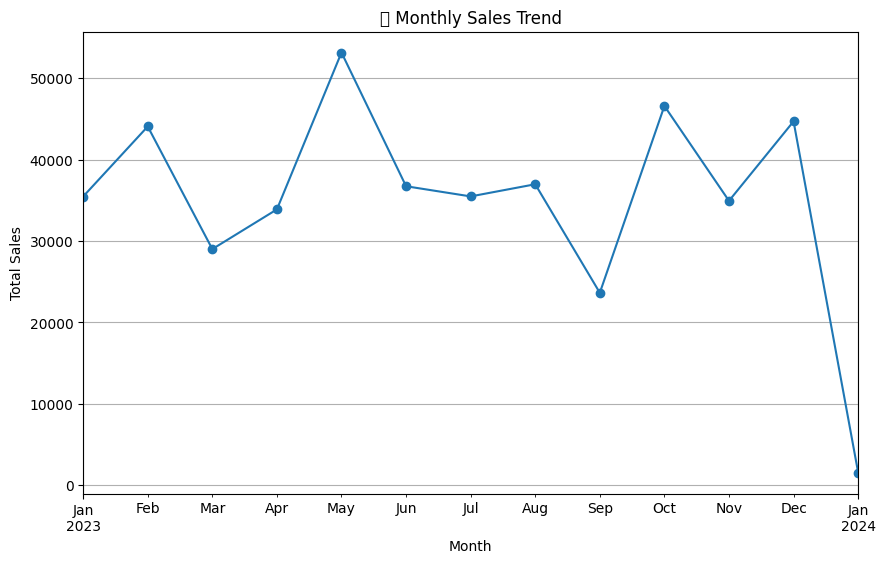

/tmp/ipython-input-516142996.py:57: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


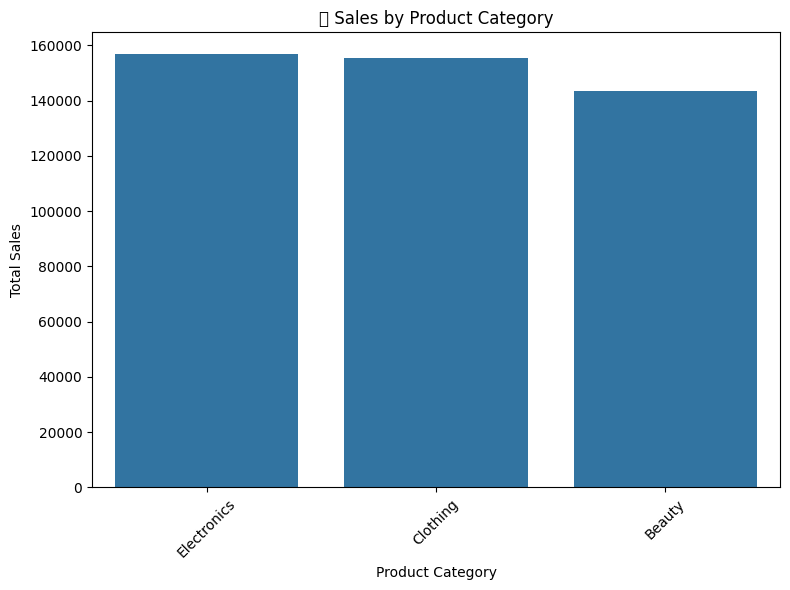

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129489 (\N{ADULT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


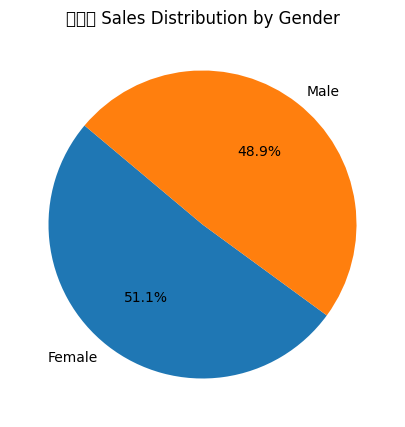

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


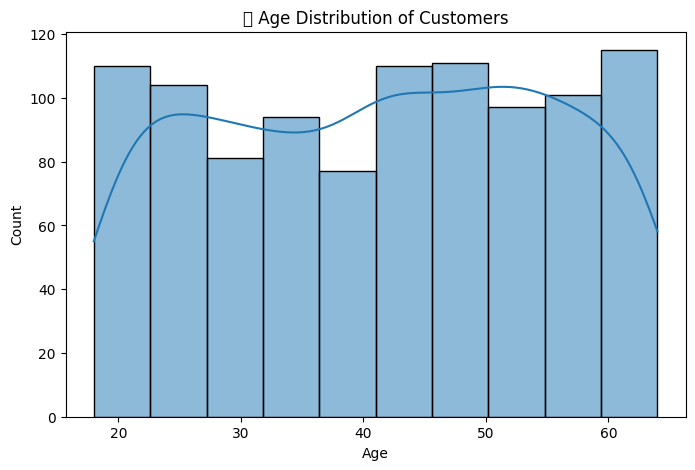

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


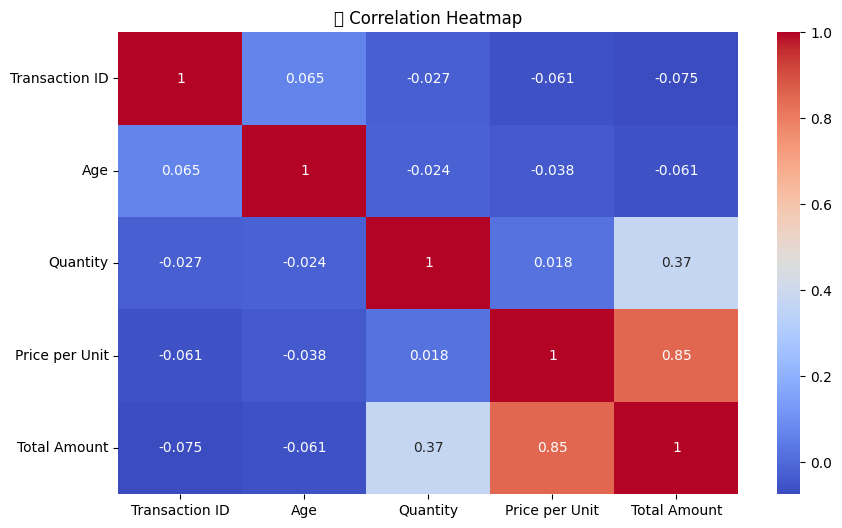

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


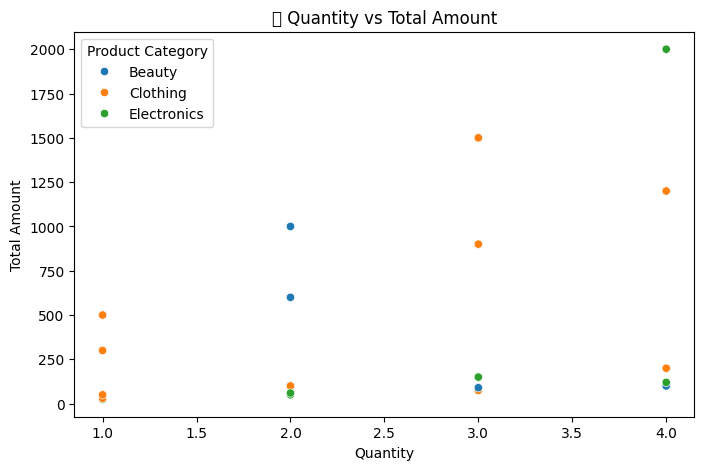

✅ EDA Completed Successfully!


In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset (you can skip if already loaded)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('retail_sales_dataset.csv')

# Step 3: Preview the data
print("📌 First 5 Rows:")
print(df.head())

print("\n🔍 Dataset Info:")
print(df.info())

print("\n📏 Statistical Summary:")
print(df.describe())

# Step 4: Check for null values
print("\n🧼 Missing Values:")
print(df.isnull().sum())

# Step 5: Data types
print("\n📦 Data Types:")
print(df.dtypes)

# Step 6: Unique values
print("\n🧾 Unique Categories:", df['Product Category'].unique())
print("👥 Unique Genders:", df['Gender'].unique())

# Step 7: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 8: Sales over time
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,6))
plt.title('🗓️ Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Step 9: Sales by Category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('📦 Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 10: Gender-based sales
gender_sales = df.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(6,5))
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('🧑‍🤝‍🧑 Sales Distribution by Gender')
plt.ylabel('')
plt.show()

# Step 11: Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('📊 Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Step 12: Heatmap of numerical correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("🔗 Correlation Heatmap")
plt.show()

# Step 13: Quantity vs Total Amount
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category')
plt.title('📈 Quantity vs Total Amount')
plt.show()

print("✅ EDA Completed Successfully!")
